Includes code from *Python Machine Learning 3rd Edition* by Sebastian Raschka, Packt Publishing Ltd. 2019

Prepared for use in COSC-247 Machine Learning at Amherst College, Fall 2020, by Lee Spector (lspector@amherst.edu).

# Training LinearRegressionGD on the Boston housing dataset

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc.fit(y_train[:, np.newaxis])
y_train_std = sc.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc.transform(y_test[:, np.newaxis]).flatten()

##################

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
est = LinearRegressionGD()
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 8633007522077303898112.000, test: 7065331788890949812224.000
R^2 train: -8633007522077300752384.000, test: -7359732204517148590080.000


# Here's what that Boston housing dataset looks like

In [8]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
X_train_std

array([[ 0.14598295, -0.48160307,  1.00571799, ...,  0.83082915,
         0.31152006,  0.55994743],
       [-0.41917438, -0.48160307, -1.00311153, ...,  0.18851509,
         0.08712729, -0.06133974],
       [-0.41156559, -0.48160307,  0.3932521 , ..., -1.09611303,
         0.44091844, -0.92573928],
       ...,
       [ 0.23385823, -0.48160307,  1.00571799, ...,  0.83082915,
         0.44091844,  0.84357854],
       [-0.38896065, -0.48160307, -0.73790501, ..., -0.45379897,
         0.22014137, -0.30310149],
       [-0.41709292, -0.48160307, -0.77307051, ...,  0.37203339,
         0.44091844, -0.58808321]])

In [10]:
y_train_std

array([-0.67209207, -0.54913221,  0.72517916,  0.16627067, -0.19143077,
       -0.28085613, -0.37028149,  0.05448897, -0.49324136,  0.93756439,
       -0.43735051, -0.16907443,  0.25569602, -0.53795404, -0.98508083,
        0.07684531, -0.1802526 , -0.10200541, -0.37028149, -0.35910332,
       -0.43735051,  0.11037982,  1.18348412,  0.21098334, -1.3316041 ,
       -0.2920343 ,  1.2281968 , -0.97390266, -0.7726956 ,  0.3004087 ,
        0.24451785, -1.40985129,  0.23333968, -0.403816  ,  2.44661732,
        3.11730751,  0.28923053, -0.0684709 , -1.53281115, -0.03493639,
        3.11730751,  0.18862701,  1.14994961,  0.25569602, -0.50441953,
        0.8593172 , -1.39867312, -0.60502306, -0.92918998,  1.10523693,
       -0.67209207, -1.54398932,  0.50161576, -0.87329913, -0.79505194,
        0.70282282,  1.12759327, -0.56031038,  0.81460452, -1.30924776,
       -0.59384489,  1.04934608,  0.60221929,  2.7484279 ,  0.60221929,
       -0.54913221,  0.14391433,  1.06052425, -0.92918998, -0.01

# Training sklearn's LinearRegression on the Boston housing dataset

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc.fit(y_train[:, np.newaxis])
y_train_std = sc.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc.transform(y_test[:, np.newaxis]).flatten()

##################

from sklearn.linear_model import LinearRegression

est = LinearRegression()
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.209, test: 0.277
R^2 train: 0.791, test: 0.712


# Training sklearn's Ridge on the Boston housing dataset

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc.fit(y_train[:, np.newaxis])
y_train_std = sc.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc.transform(y_test[:, np.newaxis]).flatten()

##################

from sklearn.linear_model import Ridge

est = Ridge(alpha=1.0)
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.253, test: 0.315
R^2 train: 0.747, test: 0.721


# Training sklearn's RandomForestRegressor on the Boston housing dataset

In [13]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc.fit(y_train[:, np.newaxis])
y_train_std = sc.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc.transform(y_test[:, np.newaxis]).flatten()

##################

from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=1000, 
                            criterion='mse', 
                            random_state=1, 
                            n_jobs=-1)
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.021, test: 0.138
R^2 train: 0.979, test: 0.878


# Training gplearn on the Boston housing dataset

In [14]:
# %pip install gplearn

In [17]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc.fit(y_train[:, np.newaxis])
y_train_std = sc.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc.transform(y_test[:, np.newaxis]).flatten()

##################

from gplearn.genetic import SymbolicRegressor

est = SymbolicRegressor(population_size=1000,
                        init_depth=(4,6),
                        generations=100, stopping_criteria=0.01,
                        p_crossover=0.3, p_subtree_mutation=0.35,
                        p_hoist_mutation=0.0, p_point_mutation=0.35,
                        max_samples=1.0, verbose=1,
                        #const_range=None,
                        const_range=(-1.0,1.0),
                        tournament_size=5,
                        function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 
                                      'abs', 'neg', 'inv', 'max','min', 'sin', 'cos', 'tan'),
                        parsimony_coefficient=0.0001, random_state=0)
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.17          4.02961        2         0.520314              N/A     50.28s
   1    10.23           1.3273        5         0.488919              N/A     48.64s
   2     9.71           1.6939        5         0.488919              N/A     46.77s
   3     9.21          1.37369        6         0.461657              N/A     45.58s
   4     8.90          1.64418        6         0.461657              N/A     43.70s
   5     7.90          1.02336        5         0.437726              N/A     44.11s
   6     8.19          1.07215        5         0.437726              N/A     43.07s
   7     9.27          4.02803        5         0.437726              N/A     46.89s
   8    10.94          1.09921        5         0.437726              N/A  

  94    62.51         0.536567      108         0.283228              N/A      3.58s
  95    61.92         0.622141      113         0.283228              N/A      2.92s
  96    62.64         0.583108       64         0.283273              N/A      2.14s
  97    63.49         0.672799      105         0.283286              N/A      1.52s
  98    64.69         0.529952      106         0.283286              N/A      0.73s
  99    65.49         0.584112      111         0.283286              N/A      0.00s
MSE train: 0.182, test: 0.221
R^2 train: 0.818, test: 0.805


In [18]:
print(est._program)

max(min(min(sub(sub(add(X1, max(X5, sin(X11))), X6), X10), X5), max(X1, max(X5, add(abs(sqrt(sqrt(min(min(sub(sub(neg(X12), X6), X10), X5), log(abs(X12)))))), neg(max(X4, X4)))))), max(min(max(min(min(sub(sub(div(X0, min(sqrt(mul(X4, add(X12, X7))), X3)), X10), X10), X5), max(X1, max(X5, neg(sub(-0.295, X12))))), max(min(neg(X12), max(X3, mul(X5, neg(X2)))), neg(sqrt(neg(sqrt(div(X0, cos(X10)))))))), max(X3, mul(X5, neg(X2)))), neg(sqrt(neg(sqrt(div(X0, max(inv(add(X10, X10)), sub(X5, sin(inv(min(add(X5, 0.538), abs(X12)))))))))))))


# Training PyshGP on the Boston housing dataset

In [19]:
%pip install pyshgp

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc.fit(y_train[:, np.newaxis])
y_train_std = sc.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc.transform(y_test[:, np.newaxis]).flatten()

##################

from pyshgp.gp.selection import Lexicase
from pyshgp.gp.estimators import PushEstimator
from pyshgp.gp.genome import GeneSpawner
from pyshgp.push.instruction_set import InstructionSet
import random

instruction_set = (
    InstructionSet()
    .register_core_by_stack({"float"}, exclude_stacks={"str", "exec", "code"})
)

spawner = GeneSpawner(
    n_inputs=13,
    instruction_set=instruction_set,
    literals=[],
    erc_generators=[
        lambda: random.random()
    ]
)

ep_lex_sel = Lexicase(epsilon=True)

est = PushEstimator(
    population_size=100,
    max_generations=20,
    simplification_steps=50,
    spawner=spawner,
    selector=ep_lex_sel,
    initial_genome_size=(5,20),
    error_threshold=0.01,
    verbose=2
)

est.fit(X_train_std, [[wrap] for wrap in y_train_std])

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

[<class 'numpy.float64'>]
Setup
Search Configuration:
signature: ProgramSignature(arity=13, output_stacks=['float'], push_config=PushConfig(numeric_magnitude_limit=1000000000000.0, growth_cap=500, runtime_limit=10, step_limit=500, collection_size_cap=1000))
evaluator: <pyshgp.gp.evaluation.DatasetEvaluator object at 0x7fa07871ccd0>
spawner: <pyshgp.gp.genome.GeneSpawner object at 0x7fa078729eb0>
population_size: 100
max_generations: 20
error_threshold: 0.0
initial_genome_size: (5, 20)
simplification_steps: 50
parallel_context: None
selection: <pyshgp.utils.DiscreteProbDistrib object at 0x7fa0788cce80>
variation: <pyshgp.utils.DiscreteProbDistrib object at 0x7fa0788cc640>
Instructions:
float_add, float_sub, float_mult, float_div, float_mod, float_min, float_max, float_inc, float_dec, float_sin, float_cos, float_tan, noop, noop_open, print_float, println_float, float_pop, float_dup, float_swap, float_rot, float_flush
Literals:
[]
ERC Generators:
[<function <lambda> at 0x7fa078b2edc0>]
St

MSE train: 0.436, test: 0.574
R^2 train: 0.564, test: 0.492


# Artificial data from $$target = 2*sin(a)+b^2$$

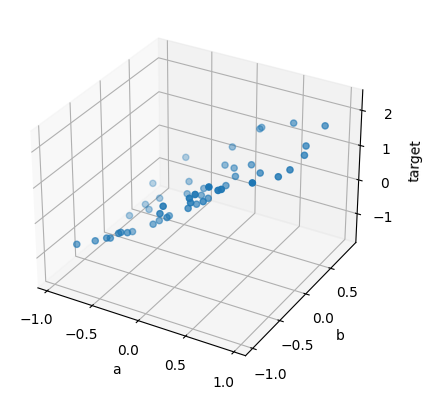

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d
plt.rcdefaults() 

import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([target_function(x[0], x[1]) for x in X])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X[:,0], X[:,1], y)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('target')

#ax.view_init(30, 300) # default, or close
#ax.view_init(10, 280)
#ax.view_init(10, 340)

plt.show()

# Training PyshGP on the artificial dataset

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([[target_function(x[0], x[1])] for x in X])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

##################

from pyshgp.gp.selection import Lexicase
from pyshgp.gp.estimators import PushEstimator
from pyshgp.gp.genome import GeneSpawner
from pyshgp.push.instruction_set import InstructionSet
import random

instruction_set = (
    InstructionSet()
    .register_core_by_name("input.*")
    .register_core_by_name("float_add")
    .register_core_by_name("float_mult")
    .register_core_by_name("float_sub")
    .register_core_by_name("float_div")
    .register_core_by_name("float_sin")
    .register_core_by_name("float_cos")
    .register_core_by_name("float_tan")
    .register_core_by_name("float_dup")
)

spawner = GeneSpawner(
    n_inputs=2,
    instruction_set=instruction_set,
    literals=[],
    erc_generators=[
        lambda: float(random.randint(-5, 5))
    ]
)

ep_lex_sel = Lexicase(epsilon=True)

est = PushEstimator(
    population_size=300,
    max_generations=20,
    simplification_steps=50,
    spawner=spawner,
    selector=ep_lex_sel,
    initial_genome_size=(5,10),
    error_threshold=0.01,
    verbose=2
)

est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

[<class 'numpy.float64'>]
Setup
Search Configuration:
signature: ProgramSignature(arity=2, output_stacks=['float'], push_config=PushConfig(numeric_magnitude_limit=1000000000000.0, growth_cap=500, runtime_limit=10, step_limit=500, collection_size_cap=1000))
evaluator: <pyshgp.gp.evaluation.DatasetEvaluator object at 0x7fa0184c4250>
spawner: <pyshgp.gp.genome.GeneSpawner object at 0x7fa088c94850>
population_size: 300
max_generations: 20
error_threshold: 0.0
initial_genome_size: (5, 10)
simplification_steps: 50
parallel_context: None
selection: <pyshgp.utils.DiscreteProbDistrib object at 0x7fa078b58d00>
variation: <pyshgp.utils.DiscreteProbDistrib object at 0x7fa078b58c40>
Instructions:
float_add, float_mult, float_sub, float_div, float_sin, float_cos, float_tan, float_dup, float_dup_times
Literals:
[]
ERC Generators:
[<function <lambda> at 0x7fa08a4b6b80>]
Start Run
2020-10-20 10:03:40.157554 | GENERATION: 1 | ERRORS: best=12.424498825091687, median=32.47737634055524, diversity=0.4066666

# Training gplearn on the artificial dataset

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([target_function(x[0], x[1]) for x in X])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

##################

from gplearn.genetic import SymbolicRegressor

est = SymbolicRegressor(population_size=1000,
                        init_depth=(4,6),
                        generations=100, stopping_criteria=0.01,
                        p_crossover=0.3, p_subtree_mutation=0.35,
                        p_hoist_mutation=0.0, p_point_mutation=0.35,
                        max_samples=1.0, verbose=1,
                        const_range=None,
                        #const_range=(-1.0,1.0),
                        tournament_size=5,
                        function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 
                                      'abs', 'neg', 'inv', 'max','min', 'sin', 'cos', 'tan'),
                        parsimony_coefficient=0.0001, random_state=0)
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    17.38          8.40878        2          0.41415              N/A     53.59s
   1    15.25          1.53809        4          0.41415              N/A     51.32s
   2    15.56           1.5832        3         0.353018              N/A     48.42s
   3    15.39          1.26539       38         0.346968              N/A     48.52s
   4    13.55          1.31843       12         0.287245              N/A     47.61s
   5    12.43          1.43881        7        0.0762943              N/A     47.72s
   6    12.85          1.30276        7        0.0762943              N/A      1.04m
   7    15.51          1.23835        7        0.0762943              N/A      1.12m
   8    19.37          2.78927        8        0.0381471              N/A  

In [24]:
print(est._program)

add(add(sin(X0), sin(X0)), mul(X1, X1))


# Training sklearn's RandomForestRegressor on the artificial dataset

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([target_function(x[0], x[1]) for x in X])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

##################

from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=1000, 
                            criterion='mse', 
                            random_state=1, 
                            n_jobs=-1)
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.012, test: 0.079
R^2 train: 0.990, test: 0.931


# Training sklearn's Ridge on the artificial dataset

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([target_function(x[0], x[1]) for x in X])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

##################

from sklearn.linear_model import Ridge

est = Ridge(alpha=1.0)
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.087, test: 0.101
R^2 train: 0.922, test: 0.912


# Training sklearn's LinearRegression on the artificial dataset

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([target_function(x[0], x[1]) for x in X])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

##################

from sklearn.linear_model import LinearRegression

est = LinearRegression()
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.077, test: 0.098
R^2 train: 0.931, test: 0.915


# Training LinearRegressionGD on the artificial dataset

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

def target_function(a, b):
    """Generate a training data point."""
    return (2.0 * np.sin(a)) + (b * b)

np.random.seed(0)
X = np.random.rand(50,2)*2-1
y = np.array([target_function(x[0], x[1]) for x in X])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

##################


class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
est = LinearRegressionGD()
est.fit(X_train, y_train)

##################

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.823, test: 0.958
R^2 train: 0.268, test: 0.169
